In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('framingham.csv')

Saving framingham.csv to framingham.csv


In [6]:
df.head()
df.info()
df.describe()
for column in df.columns:
  if df[column].is_unique:
    print(f"Column '{column}' is potentially unique.")
    break
else:
  print("No single column is guaranteed to be unique. Consider a combination of columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   male        4240 non-null   int64  
 1   age         4240 non-null   int64  
 2   cigsPerDay  4240 non-null   float64
 3   diabetes    4240 non-null   int64  
 4   totChol     4240 non-null   float64
 5   sysBP       4240 non-null   float64
 6   diaBP       4240 non-null   float64
 7   BMI         4240 non-null   float64
 8   heartRate   4240 non-null   float64
 9   glucose     4240 non-null   float64
 10  TenYearCHD  4240 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 364.5 KB
No single column is guaranteed to be unique. Consider a combination of columns.


In [7]:
columns_to_remove = ['education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp']
existing_columns = df.columns
columns_to_remove = [col for col in columns_to_remove if col in existing_columns]
df = df.drop(columns=columns_to_remove)
df.head()

,male,age,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   male        4240 non-null   int64  
 1   age         4240 non-null   int64  
 2   cigsPerDay  4240 non-null   float64
 3   diabetes    4240 non-null   int64  
 4   totChol     4240 non-null   float64
 5   sysBP       4240 non-null   float64
 6   diaBP       4240 non-null   float64
 7   BMI         4240 non-null   float64
 8   heartRate   4240 non-null   float64
 9   glucose     4240 non-null   float64
 10  TenYearCHD  4240 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 364.5 KB


In [9]:
df.isnull().sum()

,0
male,0
age,0
cigsPerDay,0
diabetes,0
totChol,0
sysBP,0
diaBP,0
BMI,0
heartRate,0
glucose,0


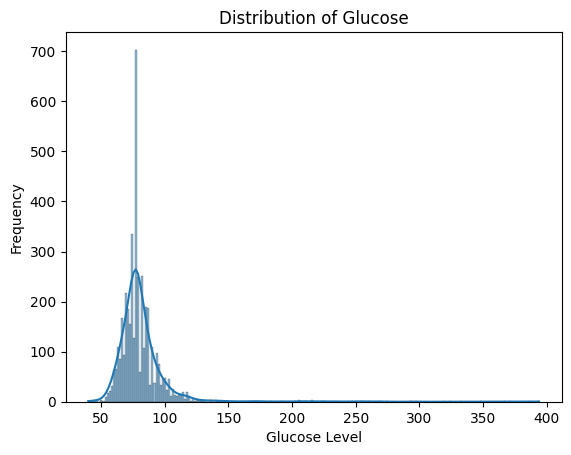

In [10]:
sns.histplot(df['glucose'], kde=True)
plt.title('Distribution of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

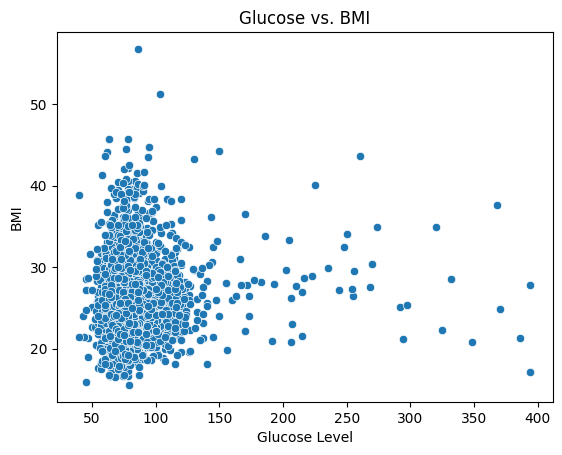

In [13]:
sns.scatterplot(x='glucose', y='BMI', data=df)
plt.title('Glucose vs. BMI')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.show()

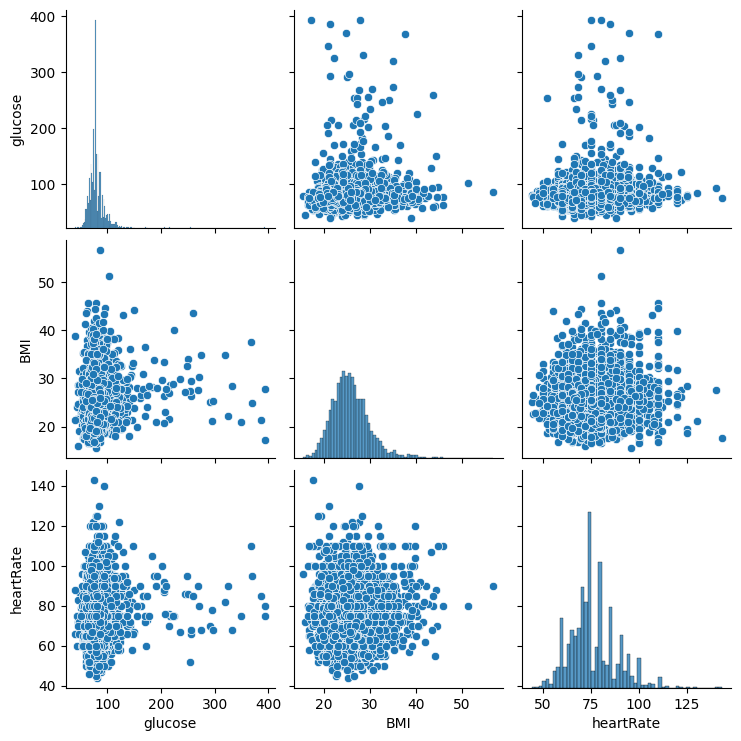

In [12]:
sns.pairplot(df[['glucose', 'BMI', 'heartRate']])  # Include relevant columns
plt.show()

In [14]:
correlations = df.corr()['TenYearCHD']
threshold = 0.2
selected_features = correlations[abs(correlations) > threshold].index

In [18]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(df)


In [21]:
from sklearn.model_selection import train_test_split

# Get column names from original DataFrame before VarianceThreshold
feature_names = df.columns  # Assuming 'df' is your original DataFrame

# After applying VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X = selector.fit_transform(df)

# Now, selected_features will contain the indices of the selected columns
selected_features = selector.get_support(indices=True)

# Use these indices to get the actual column names
selected_feature_names = [feature_names[i] for i in selected_features]

# Finally, select those columns from your DataFrame
X = df[selected_feature_names]
y = df['glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = linreg_model.predict(X_test)  # Replace with your chosen model

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.018729405352993e-30
R-squared: 1.0


In [38]:

new_data_dict = {'age': 55, 'sysBP': 135, 'diaBP': 85, 'totChol': 220, 'BMI': 27.5,
                 'male': 1, 'cigsPerDay': 0, 'heartRate': 75, 'glucose': 100, 'TenYearCHD': 0}

new_data_dict['glucose_bmi_interaction'] = new_data_dict['glucose'] * new_data_dict['BMI']

import pandas as pd
new_data = pd.DataFrame([new_data_dict])

predicted_glucose = linreg_model.predict(new_data[selected_feature_names])

print(predicted_glucose)

[100.]


In [39]:
feature_importances = rf_model.feature_importances_

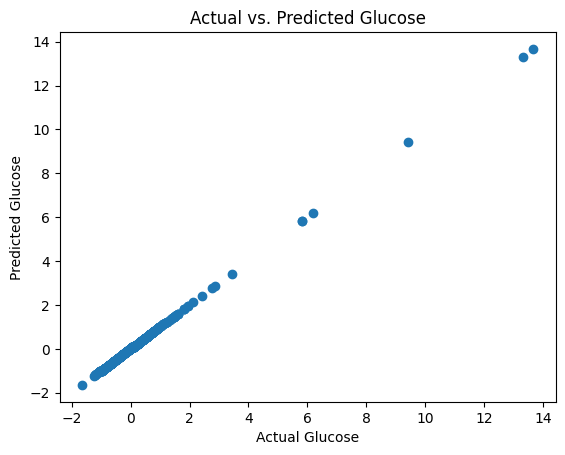

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs. Predicted Glucose")
plt.show()